# Customer Segmentation: Clustering

## Customer Personality Analysis

**Problem Statement**

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

*About the dataset*

**People**

* ID: Customer's unique identifier.
* Year_Birth: Customer's birth year.
* Education: Customer's education level.
* Marital_Status: Customer's marital status.
* Income: Customer's yearly household income.
* Kidhome: Number of children in customer's household.
* Teenhome: Number of teenagers in customer's household.
* Dt_Customer: Date of customer's enrollment with the company.
* Recency: Number of days since customer's last purchase.
* Complain: 1 if the customer complained in the last 2 years, 0 otherwise.

**Products**

* MntWines: Amount spent on wine in last 2 years.
* MntFruits: Amount spent on fruits in last 2 years.
* MntMeatProducts: Amount spent on meat in last 2 years.
* MntFishProducts: Amount spent on fish in last 2 years.
* MntSweetProducts: Amount spent on sweets in last 2 years.
* MntGoldProds: Amount spent on gold in last 2 years.

**Promotion**

* NumDealsPurchases: Number of purchases made with a discount.
* AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise.
* AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise.
* AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise.
* AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise.
* AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise.
* Response: 1 if customer accepted the offer in the last campaign, 0 otherwise.

**Place**

* NumWebPurchases: Number of purchases made through the company’s website.
* NumCatalogPurchases: Number of purchases made using a catalogue.
* NumStorePurchases: Number of purchases made directly in stores.
* NumWebVisitsMonth: Number of visits to company’s website in the last month.

**Objective**

*Customer Segmentation*

The objective is to conduct unsupervised clustering analysis on the grocery firm's customer database to segment customers based on similarities in their characteristics and behaviors. This segmentation will facilitate tailored marketing strategies and product offerings, optimizing customer engagement and addressing diverse customer needs.

### Table of Contents

- Import libraries

- Load the data

- Data cleaning

- Data preprocessing

- Dimensionality reduction

- Clustering

- Evaluating models

- Profiling 

- Conclusion

In [ ]:
# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import warnings
warnings.filterwarnings('ignore')

from matplotlib import colors
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer

In [ ]:
# Load the data

In [2]:
df = pd.read_csv('marketing_campaign.csv', sep="\t")
print("Number of datapoints:", len(df))

Number of datapoints: 2240


In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Data cleaning

In [4]:
df.shape

(2240, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

- There are missing values in 'Income'.
- 'Dt_Customer' indicates the date a customer joined the database, is not parsed as DateTime.

In [6]:
# Double check for missing values
df.isnull().sum().sort_values(ascending=False)

Income                 24
ID                      0
NumDealsPurchases       0
Z_Revenue               0
Z_CostContact           0
Complain                0
AcceptedCmp2            0
AcceptedCmp1            0
AcceptedCmp5            0
AcceptedCmp4            0
AcceptedCmp3            0
NumWebVisitsMonth       0
NumStorePurchases       0
NumCatalogPurchases     0
NumWebPurchases         0
MntGoldProds            0
Year_Birth              0
MntSweetProducts        0
MntFishProducts         0
MntMeatProducts         0
MntFruits               0
MntWines                0
Recency                 0
Dt_Customer             0
Teenhome                0
Kidhome                 0
Marital_Status          0
Education               0
Response                0
dtype: int64

In [7]:
# Checking for skewness for 'Income' feature
income_skewness = df['Income'].skew()
print("Skewness of Income:", income_skewness)

Skewness of Income: 6.763487372811116


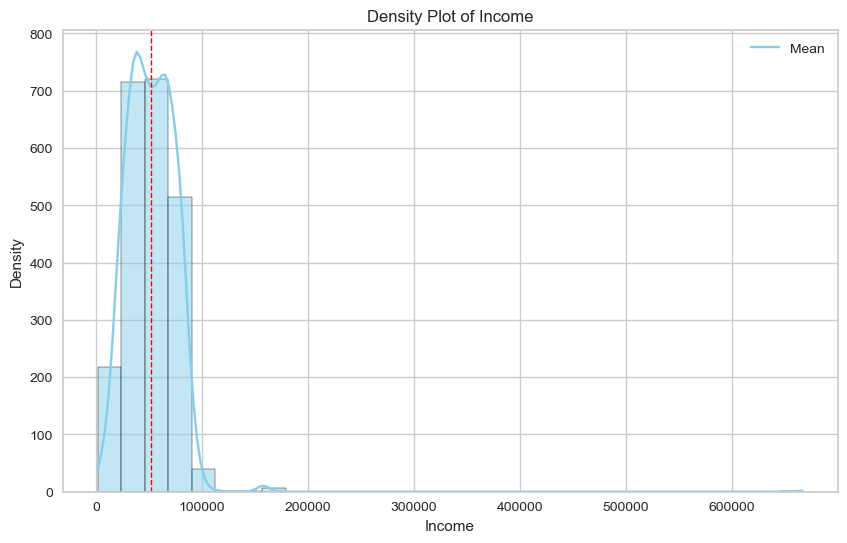

In [8]:
# Let's visualize the skewness
plt.figure(figsize=(10, 6))
sns.histplot(df['Income'], bins=30, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Income')
plt.ylabel('Density')
plt.title('Density Plot of Income')

plt.axvline(x=df['Income'].mean(), color='red', linestyle='dashed', linewidth=1)
plt.legend(['Mean'])
plt.show()

In [9]:
# Impute missing values with the median
income_median = df['Income'].median()
df['Income'].fillna(income_median, inplace=True)

- Let's create a feature out of 'Dt_Customer' that indicates the number of days a customer is registered in the firm's database. However, in order to keep it simple, let's take this value relative to the most recent customer in the record.

- Thus to get the values let's check the newest and oldest recorded dates.

In [10]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
dates = []

for i in df['Dt_Customer']:
    i = i.date()
    dates.append(i)
    
# Dates of the newest and oldest customers
print("Newest customer's enrollment date:", max(dates))
print("Oldest customer's enrollment date:", min(dates))

Newest customer's enrollment date: 2014-06-29
Oldest customer's enrollment date: 2012-07-30


- Let's create a new feature 'Customer_For' with the number of days the customers started to shop in the store relative to the last recorded date.

In [11]:
# New feature called 'Customer_For'
days = []
d1 = max(dates) # Taking it to be the newest customer
for i in dates:
    delta = d1 - i
    days.append(delta)
    
df['Customer_For'] = days
df['Customer_For'] = pd.to_numeric(df['Customer_For'], errors='coerce')

- Now let's explore the unique values in the categorical features to get a clear idea of the data.

In [12]:
print(df['Marital_Status'].value_counts(), "\n")
print(df['Education'].value_counts())

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64 

Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64


Next, let's perform the following steps to engineer new features:

- Extract the 'Age' of a customer by the 'Year_Birth'.
- Create a feature 'Spent' indicating the total amount spent by the customers.
- Create a feature 'Living_With' out of 'Marital_Status' to extract the living situation of couples.
- Create a feature 'Children' to indicate total children in a household that is, kids and teenagers.
- Create a feature 'Family_Size' to get further clarity of household. 
- Create a feature 'Is_Parent' to indicate parenthood status.
- Create three categories in the 'Education' feature.
- We'll also drop some of the redundant features.

In [13]:
# Feature engineering

# Age of customer today
df['Age'] = 2024-df['Year_Birth']

# Total spent
df['Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Deriving living situation by marital status 'Alone'
df['Living_With'] = df['Marital_Status'].replace({'Married': 'Partner', 'Together': 'Partner', 'Absurd': 'Alone', 'Widow': 'Alone', 'YOLO': 'Alone', 'Divorced': 'Alone', 'Single': 'Alone'})

# Total children living in the household
df['Children'] = df['Kidhome'] + df['Teenhome']

# Total members in the household
df['Family_Size'] = df['Living_With'].replace({'Alone': 1, 'Partner': 2}) + df['Children']

# Feature pertaining parenthood
df['Is_Parent'] = np.where(df.Children > 0, 1, 0)

# Segmenting education levels in three groups
df['Education'] = df['Education'].replace({'Basic': 'Undergraduate', '2n Cycle': 'Undergraduate', 'Graduation': 'Graduate', 'Master': 'Postgraduate', 'PhD': 'Postgraduate'})

# For clarity
df = df.rename(columns={'MntWines': 'Wines', 'MntFruits': 'Fruits', 'MntMeatProducts': 'Meat', 'MntFishProducts': 'Fish', 'MntSweetProducts': 'Sweets', 'MntGoldProds': 'Gold'})

# Dropping some of the redundant features
to_drop = ['Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue', 'Year_Birth', 'ID']
df = df.drop(to_drop, axis=1)

- Now that we have some new features let's have a look at the data's stats.

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   Wines                2240 non-null   int64  
 6   Fruits               2240 non-null   int64  
 7   Meat                 2240 non-null   int64  
 8   Fish                 2240 non-null   int64  
 9   Sweets               2240 non-null   int64  
 10  Gold                 2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [15]:
df.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,Graduate,58138.0,0,0,58,635,88,546,172,88,...,0,0,1,57283200000000000,67,1617,Alone,0,1,0
1,Graduate,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,9763200000000000,70,27,Alone,2,3,1
2,Graduate,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,26956800000000000,59,776,Partner,0,2,0
3,Graduate,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,12009600000000000,40,53,Partner,1,3,1
4,Postgraduate,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,13910400000000000,43,422,Partner,1,3,1


In [16]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Customer_For,Age,Spent,Children,Family_Size,Is_Parent
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52237.975446,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,0.064286,0.013393,0.009375,0.149107,3.054950e+16,55.194196,605.798214,0.950446,2.595089,0.715179
std,25037.955891,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,0.245316,0.114976,0.096391,0.356274,1.746339e+16,11.984069,602.249288,0.751803,0.906959,0.451430
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,28.000000,5.000000,0.000000,1.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,0.000000,0.000000,0.000000,1.561680e+16,47.000000,68.750000,0.000000,2.000000,0.000000
50%,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,0.000000,0.000000,0.000000,0.000000,3.071520e+16,54.000000,396.000000,1.000000,3.000000,1.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,0.000000,0.000000,0.000000,0.000000,4.570560e+16,65.000000,1045.500000,1.000000,3.000000,1.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,1.000000,1.000000,1.000000,1.000000,6.039360e+16,131.000000,2525.000000,3.000000,5.000000,1.000000


- The above stats show some discrepancies in mean 'Income' and 'Age', and max 'Income' and 'Age'.

- Do note that max-age is 131 years, as the calculated age is what would be today (i.e. 2024) and the data is old.

- Now, let's plot some features to inspect further the data.

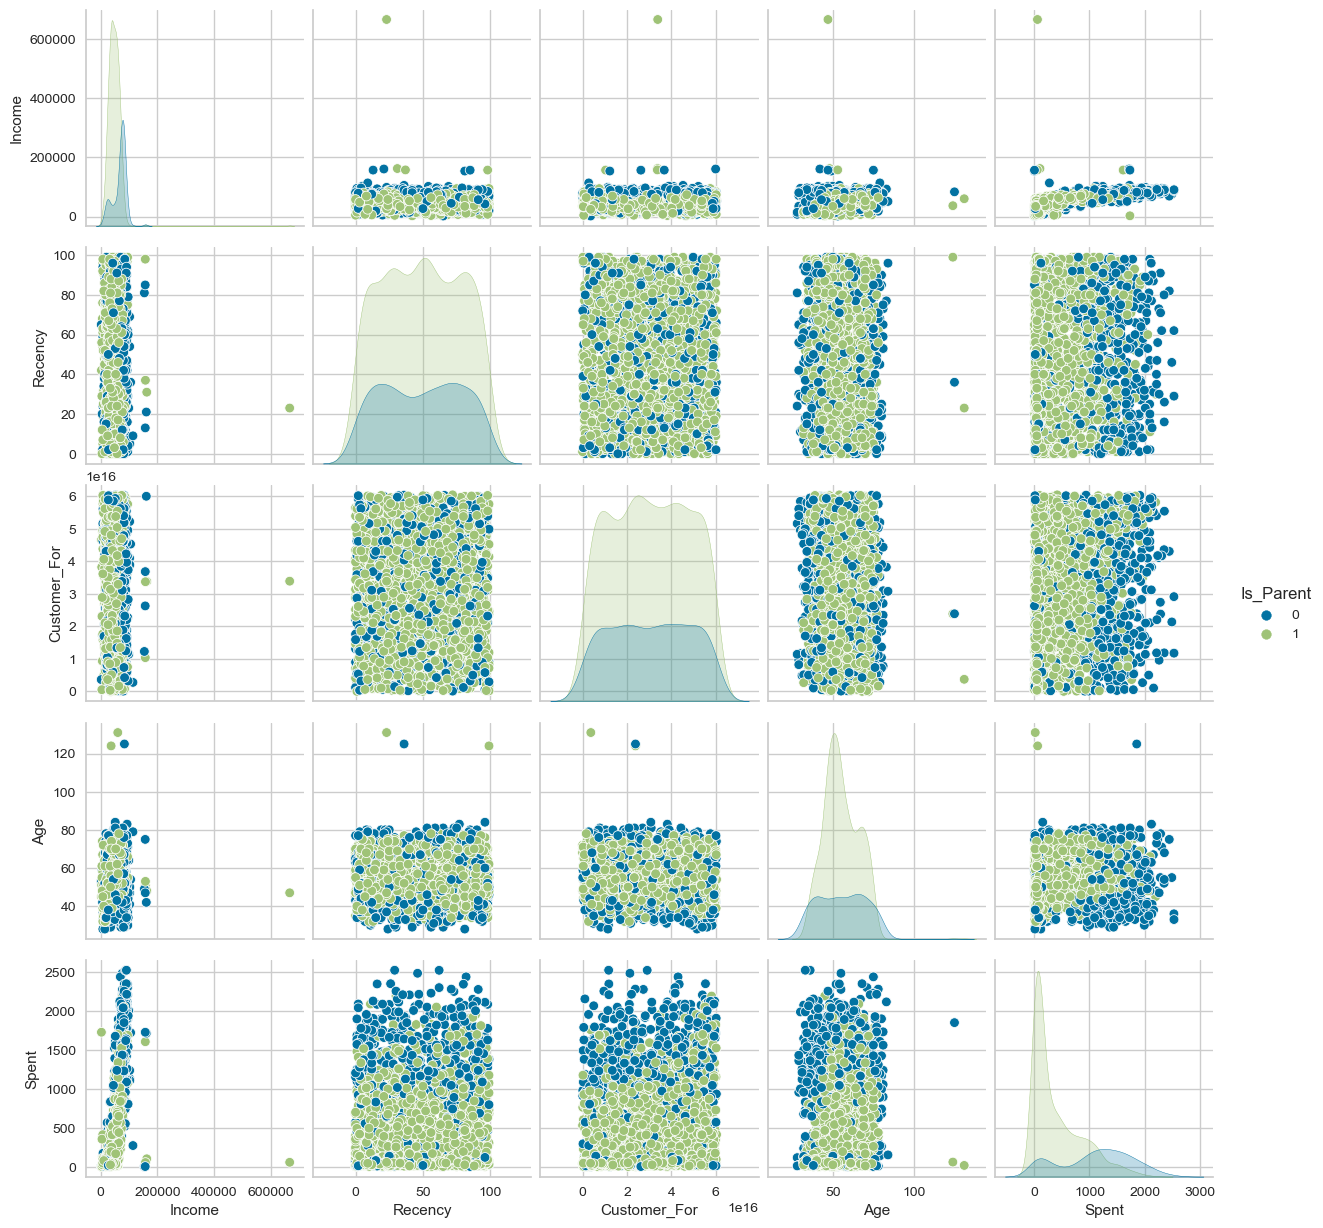

In [17]:
# Define the columns to plot
to_plot = ['Income', 'Recency', 'Customer_For', 'Age', 'Spent', 'Is_Parent']
sns.pairplot(df[to_plot], hue='Is_Parent')
plt.show()

- Clearly there are a few outliers in the 'Income' and 'Age' features. Let's handle the outliers in the data.

In [18]:
# Dropping the outliers by setting a cap on 'Age' and 'Income'
df = df[(df['Age'] < 90)]
df = df[(df['Income'] < 600000)]

print(len(df))

2236


- Next, let's look at the correlation amongst the features (excluding the categorical attributes and with certain positive correlation).

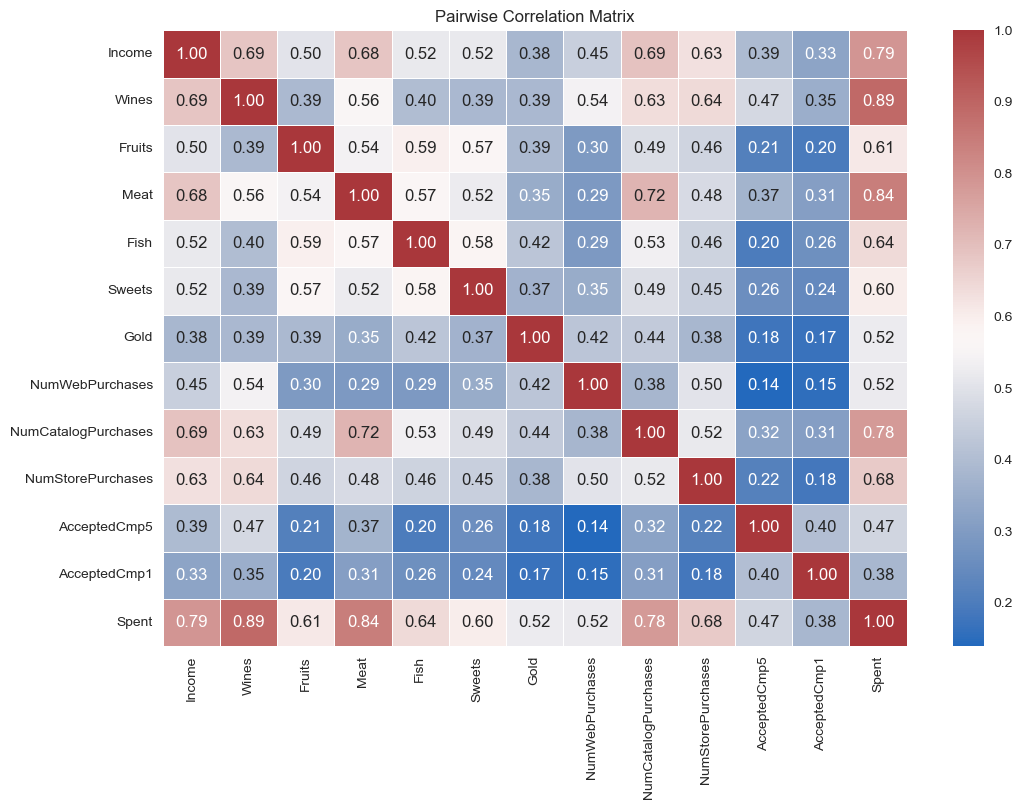

In [19]:
# Select a subset of features for pairwise correlation analysis
selected_features = ['Income', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'AcceptedCmp5', 'AcceptedCmp1', 'Spent']
correlation_matrix = df[selected_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='vlag', fmt=".2f", linewidths=0.5)
plt.title("Pairwise Correlation Matrix")
plt.show()

- The data is quite clean now, and the new features have been included. Let's move forward.

In [ ]:
# Data preprocessing

In [20]:
# Get a list of the categorical variables
categorical_features = (df.dtypes == 'object')
object_features = list(categorical_features[categorical_features].index)

print(object_features)

['Education', 'Living_With']


In [21]:
# Encode the categorical features
LE = LabelEncoder()

for i in object_features:
    df[i] = df[[i]].apply(LE.fit_transform)

In [22]:
df[['Education', 'Living_With']].head()

,Education,Living_With
0,0,0
1,0,0
2,0,1
3,0,1
4,1,1


In [23]:
# Creating a copy
data = df.copy()

In [24]:
# Creating a subset of the DF by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response']

data = data.drop(cols_del, axis=1)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2236 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2236 non-null   int64  
 1   Income               2236 non-null   float64
 2   Kidhome              2236 non-null   int64  
 3   Teenhome             2236 non-null   int64  
 4   Recency              2236 non-null   int64  
 5   Wines                2236 non-null   int64  
 6   Fruits               2236 non-null   int64  
 7   Meat                 2236 non-null   int64  
 8   Fish                 2236 non-null   int64  
 9   Sweets               2236 non-null   int64  
 10  Gold                 2236 non-null   int64  
 11  NumDealsPurchases    2236 non-null   int64  
 12  NumWebPurchases      2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumStorePurchases    2236 non-null   int64  
 15  NumWebVisitsMonth    2236 non-null   int64 

In [26]:
# Scaling
scaler = StandardScaler()

scaler.fit(data)
scaled_data = pd.DataFrame(scaler.transform(data), columns=data.columns)

In [27]:
scaled_data.head()

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent
0,-0.89438,0.288947,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,2.509801,-0.552429,0.692865,1.529793,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362
1,-0.89438,-0.262003,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-0.568970,-1.167738,-0.131421,-1.191143,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169
2,-0.89438,0.918423,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,-0.226884,1.293496,-0.543564,-0.206659,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362
3,-0.89438,-1.182183,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.911056,-0.552429,0.280722,-1.062517,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169
4,0.57070,0.296187,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.115201,0.062879,-0.131421,-0.953679,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169


In [ ]:
# Dimensionality reduction

- In this problem, there are many factors on the basis of which the final classification will be done. These factors are basically attributes or features. The higher the number of features, the harder it is to work with it. Many of these features are correlated, and hence redundant. This is why dimensionality reduction will be performed on the selected features before putting them through a classifier.

- Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.

- Principal Component Analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in the following section:**

- Dimensionality reduction with PCA.
- Plotting the reduced dataframe.
- The dimensions will be reduced to 3.

In [28]:
# Initiating PCA to reduce dimentions, aka features, to 3
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA_df = pd.DataFrame(pca.transform(scaled_data), columns=(['col_1', 'col_2', 'col_3']))
PCA_df.describe().T

,count,mean,std,min,25%,50%,75%,max
col_1,2236.0,2.542192e-17,2.873177,-5.973097,-2.528851,-0.782183,2.383734,7.457918
col_2,2236.0,1.143987e-16,1.709077,-4.195153,-1.323088,-0.175159,1.238372,6.139845
col_3,2236.0,3.257184e-17,1.229361,-3.586719,-0.838084,-0.069343,0.869148,6.683253


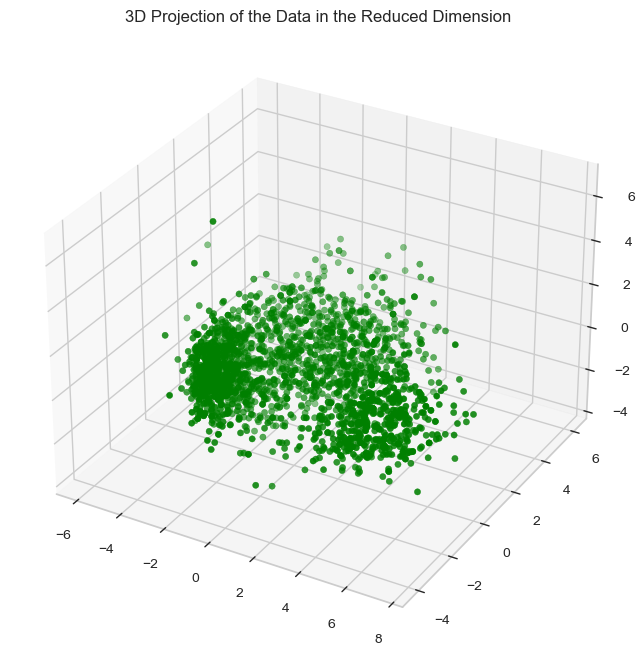

In [29]:
# A 3D projection of the data in the reduced dimension
x = PCA_df['col_1']
y = PCA_df['col_2']
z = PCA_df['col_3']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='green', marker='o')
ax.set_title("3D Projection of the Data in the Reduced Dimension")
plt.show()

- Now that the attributes have been reduced to three dimensions, let's perform the clustering via Agglomerative Clustering. Agglomerative Clustering is a hierarchical clustering method. It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering:**

- Elbow Method to determine the number of clusters to be formed.
- Clustering via Agglomerative Clustering.
- Examining the clusters formed via scatter plot.

In [ ]:
# Clustering

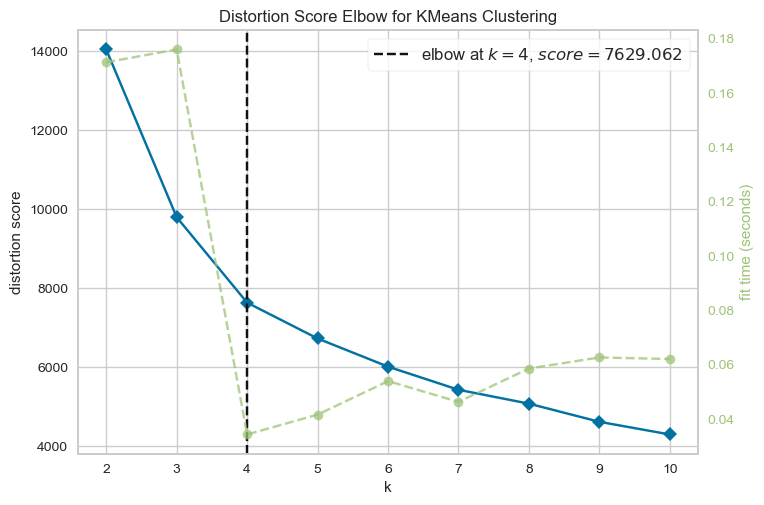

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [30]:
# Quick examination to determine the elbow method to find numbers of clusters to make
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_df)
Elbow_M.show()

- The results indicates that four will be an optimal number of clusters for this data. 
- Next, let's fit the Agglomerative Clustering model to get the final clusters.

In [31]:
# Initiating the Agglomerative Clustering model
AC = AgglomerativeClustering(n_clusters=4)

# Fit the model and predict the clusters
pred_AC = AC.fit_predict(PCA_df)
PCA_df['Clusters'] = pred_AC

# Adding the clusters feature to the original DF
df['Clusters'] = pred_AC

- To examine the clusters formed, let's have a look at the 3D distribution of the clusters.

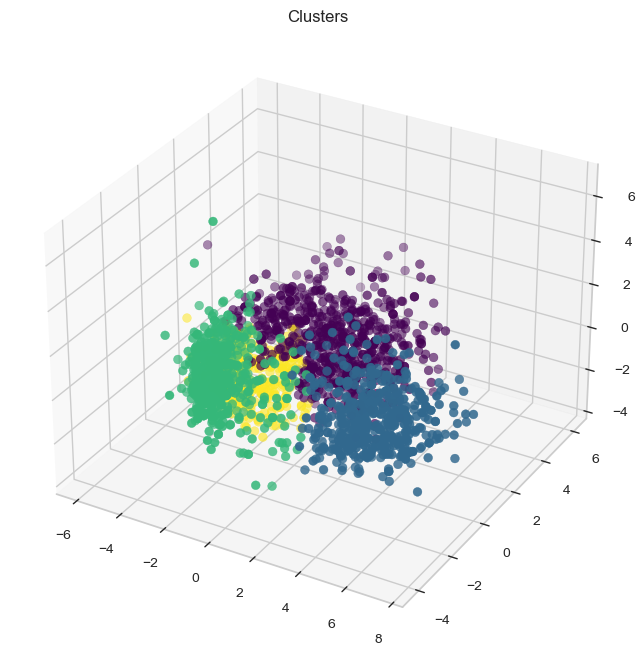

In [32]:
# Plotting the clusters
fig = plt.figure(figsize=(10, 8))
ax = plt.subplot(111, projection='3d', label='bla')
ax.scatter(x, y, z, s=40, c=PCA_df['Clusters'], marker='o', cmap='viridis')
ax.set_title("Clusters")
plt.show()

- Since this is an unsupervised clustering we do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed, and determine the nature of the clusters' patterns. For that, we will be having a look at the data in light of clusters via EDA and draw conclusions.

- First, let us have a look at the group distribution of clustering.

In [ ]:
# Evaluating models

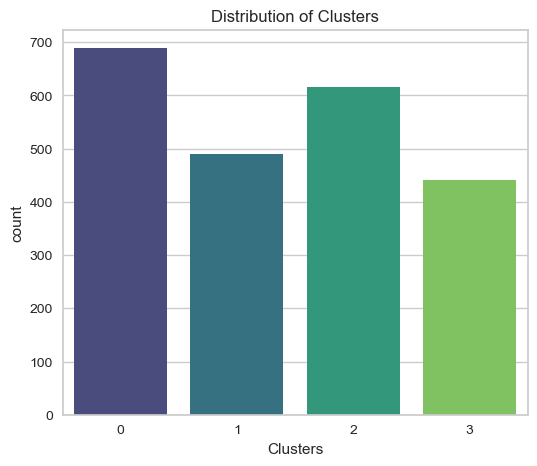

In [33]:
# Plotting the clusters
plt.figure(figsize=(6, 5))
sns.countplot(x=df['Clusters'], palette='viridis')
plt.title("Distribution of Clusters")
plt.show()

- The clusters seem to be fairly distributed.

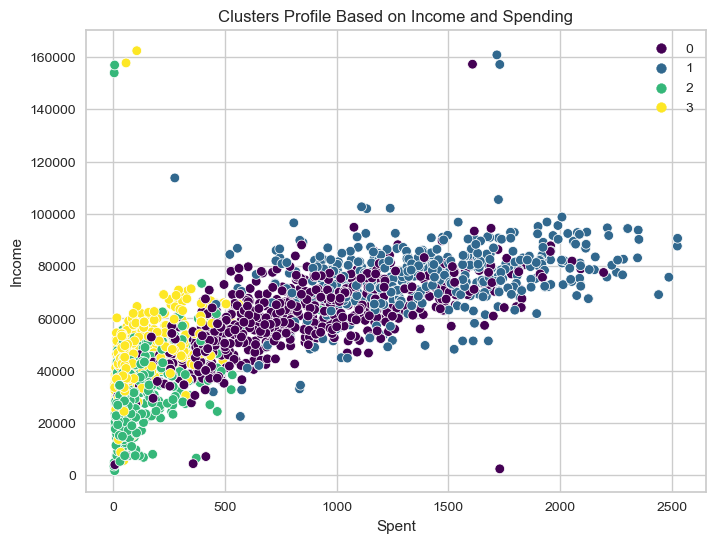

In [34]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x=df['Spent'], y=df['Income'], hue=df['Clusters'], palette='viridis')
plt.title("Clusters Profile Based on Income and Spending")
plt.legend()
plt.show()

Based on the previous plot, the clusters show the following pattern:

- Group 0: high spending & average income.
- Group 1: high spending & high income.
- Group 2: low spending & low income.
- Group 3: high spending & low income.

Next, let's look at the detailed distribution of clusters.

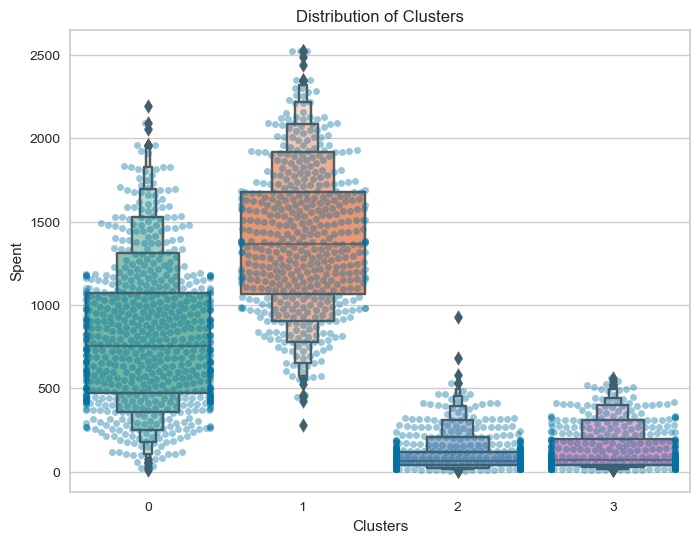

In [35]:
plt.figure(figsize=(8, 6))
sns.swarmplot(x=df['Clusters'], y=df['Spent'], alpha=0.4)
sns.boxenplot(x=df['Clusters'], y=df['Spent'], palette='Set2')
plt.title("Distribution of Clusters")
plt.show()

- From the previous plot, it shows that cluster 1 is our biggest set of customers, closely followed by cluster 0. Now we can explore what each cluster is spending on for the targeted marketing strategies.

Next, let's explore how did our campaigns do in the past.

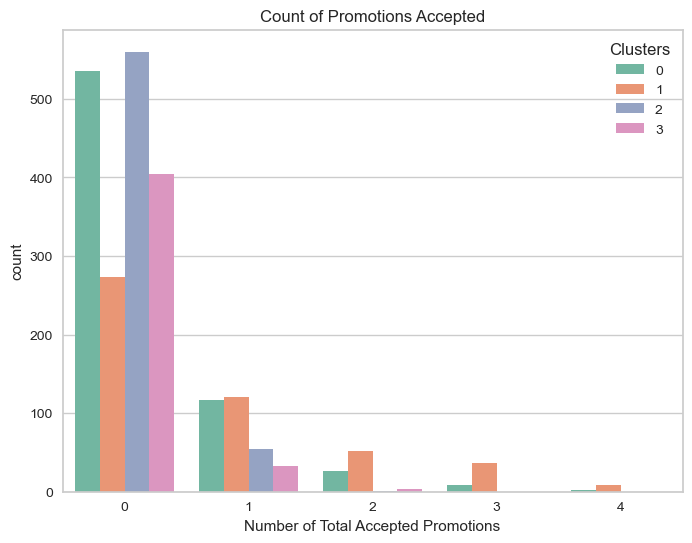

In [36]:
# Creating a new feature to get the sum of accepted promotions
df['Total_Promos'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']

plt.figure(figsize=(8, 6))
sns.countplot(x=df['Total_Promos'], hue=df['Clusters'], palette='Set2')
plt.title("Count of Promotions Accepted")
plt.xlabel("Number of Total Accepted Promotions")
plt.show()

- With this information we could  do better-targeted and well-planned campaigns to boost sales.

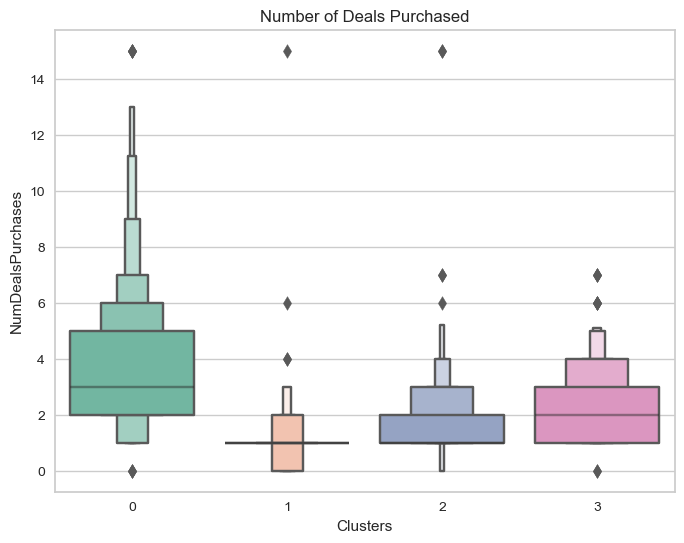

In [37]:
# Plotting the number of deals purchased
plt.figure(figsize=(8, 6))
sns.boxenplot(y=df['NumDealsPurchases'], x=df['Clusters'], palette='Set2')
plt.title("Number of Deals Purchased")
plt.show()

- The best outcomes are with cluster 0 and cluster 3. However, our star customers, cluster 1, are not much into the deals, and nothing seems to attract cluster 2 overwhelmingly.

- Now that we have formed the clusters and looked at their purchasing habits, let's see who we have in these clusters. For that, we will be profiling the clusters formed, and come to a conclusion about who is our star customer and who needs more attention from the marketing team.

- To decide the previous let's plot some features that are indicative of the customers personal traits in light of the clusters they are in. On the basis of the outcomes, we will be arriving at the conclusions.

<Figure size 800x600 with 0 Axes>

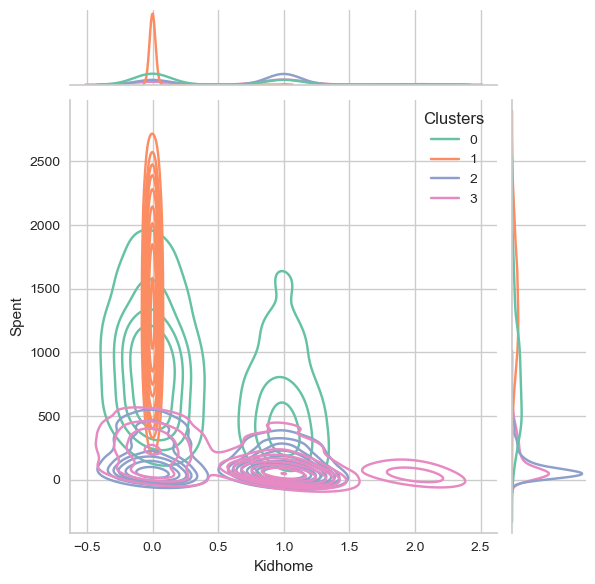

<Figure size 800x600 with 0 Axes>

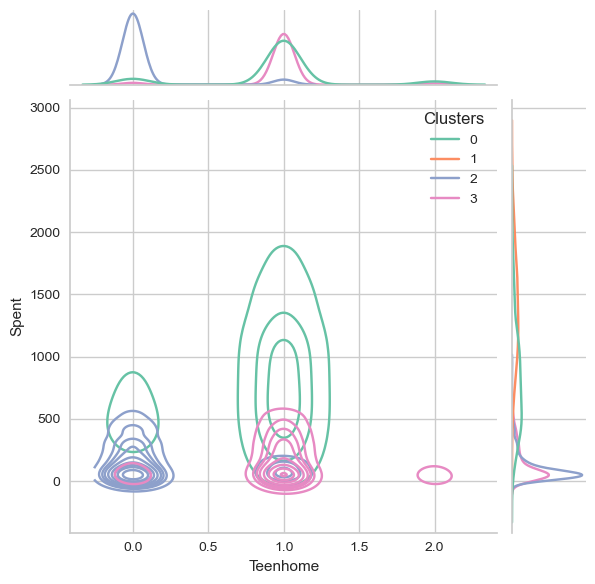

<Figure size 800x600 with 0 Axes>

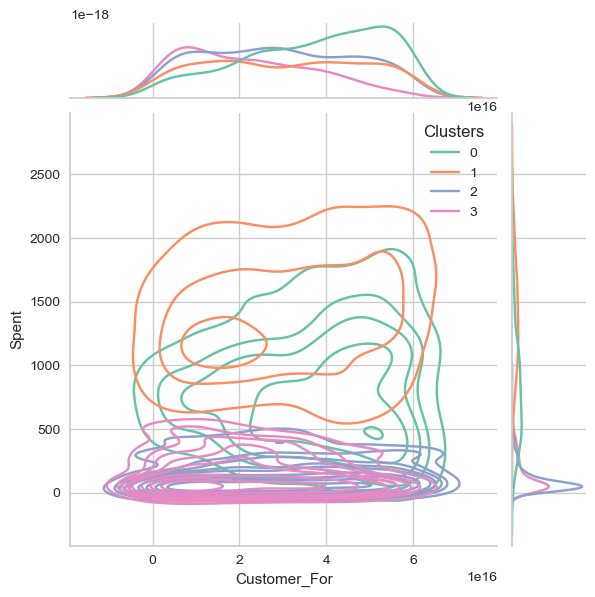

<Figure size 800x600 with 0 Axes>

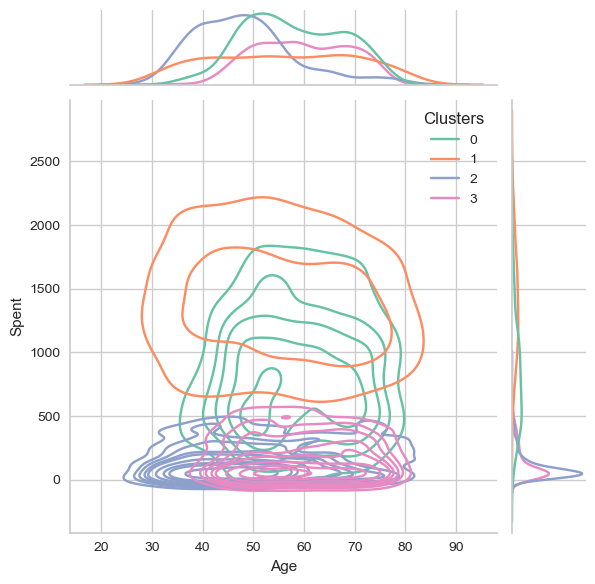

<Figure size 800x600 with 0 Axes>

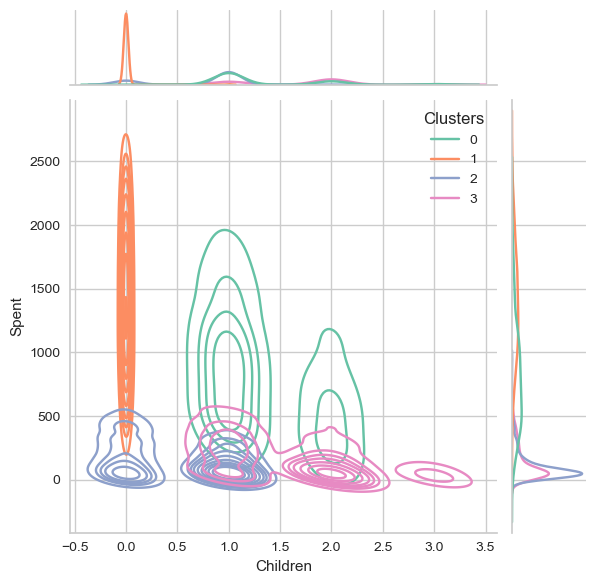

<Figure size 800x600 with 0 Axes>

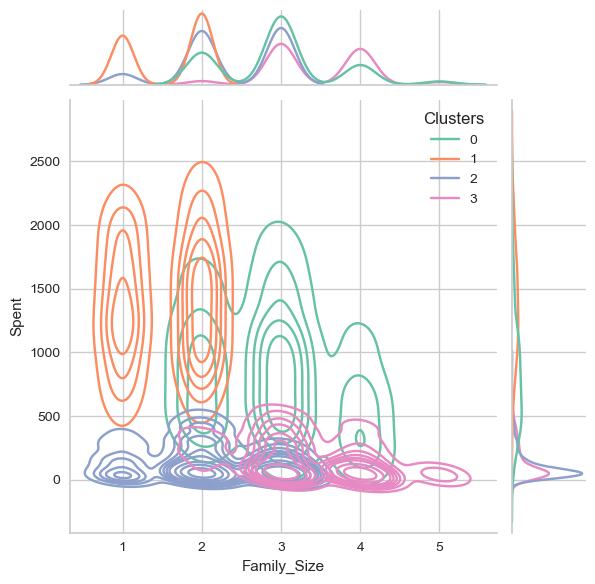

<Figure size 800x600 with 0 Axes>

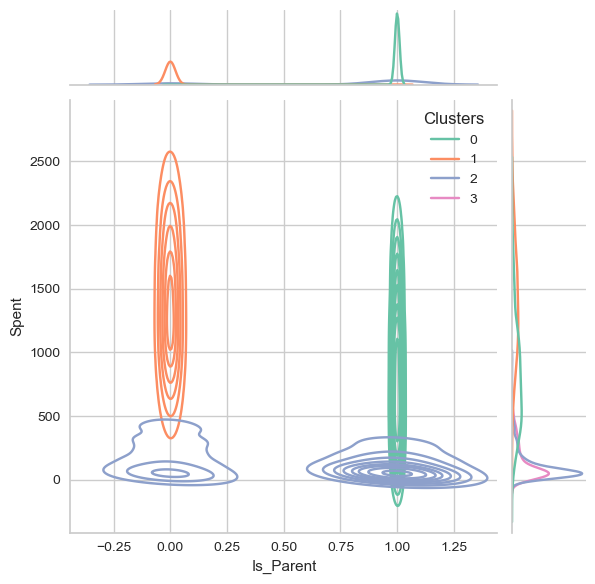

<Figure size 800x600 with 0 Axes>

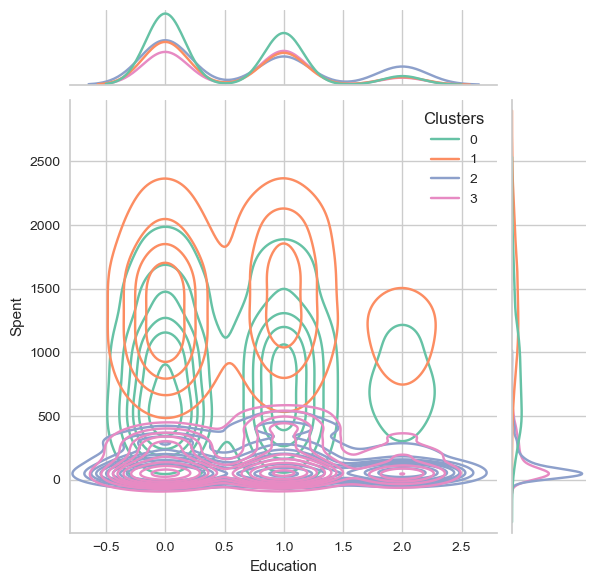

<Figure size 800x600 with 0 Axes>

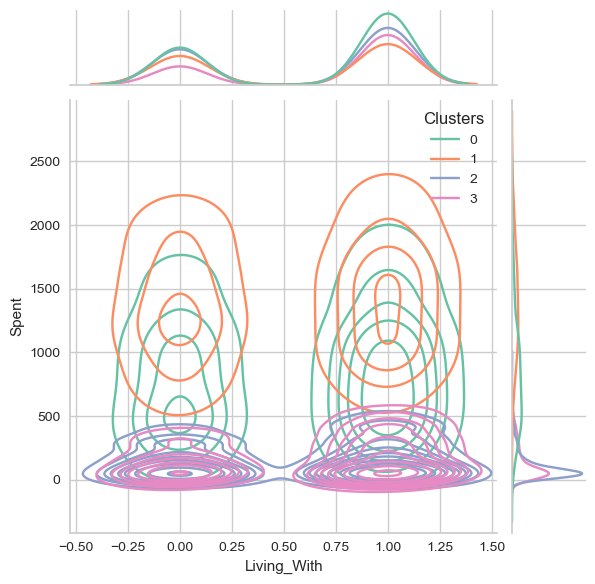

In [38]:
# Profiling
Personal = ['Kidhome', 'Teenhome', 'Customer_For', 'Age', 'Children', 'Family_Size', 'Is_Parent', 'Education', 'Living_With']

for i in Personal:
    plt.figure(figsize=(8, 6))
    sns.jointplot(x=df[i], y=df['Spent'], hue=df['Clusters'], kind='kde', palette='Set2')
    plt.show()

- The following information can be deduced about the customers in different clusters.

*Profiling the Clusters:*

**Cluster 0:**
- Are most definetely a parent.
- At the max have 4 members in the family and at least 2 members.
- Single parents are a subset of this group.
- Mostly have a teenager at home.
- Relatively older.

**Cluster 1:**
- Are most definetely not a parent.
- At the max are only 2 members in the family.
- A slight majority of couples over single people.
- Span all ages.
- A high income group.

**Cluster 2:**
- The majority of these people are parents.
- At the max are 3 members in the family.
- They majority have one kid (not teenagers, typically).
- Relatively younger.

**Cluster 3:**
- They are definetely a parent.
- At the max there are 5 members in the family and at least 2 members.
- Majority of them have a teenager at home.
- Relatively older.
- A lower-income group.

### Conclusion

- For this project unsupervised clustering was performed, and dimensionality reduction was also used, followed by agglomerative clustering. This techniques produced 4 clusters and them were used in profiling customers in clusters according to their family structures and income/spending.

- The conclusion also emphasizes the practical implications of the analysis, suggesting that the insights gained from customer segmentation can be leveraged to inform and enhance marketing strategies. By understanding the different characteristics and behaviors of customers within each cluster, businesses can tailor their marketing efforts more effectively to meet the specific needs and preferences of each group.